# Glass Identification

### Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

### Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)

- 1- building_windows_float_processed
- 2- building_windows_non_float_processed
- 3- vehicle_windows_float_processed
- 4- vehicle_windows_non_float_processed (none in this database)
- 5- containers
- 6- tableware
- 7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

#### Predict : Type of glass

Dataset Link-
- https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
- https://github.com/dsrscientist/dataset3


## importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy import stats
import scipy.stats as stats
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

## Load DataSet

In [2]:
df = pd.read_csv("glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## EDA (Exploratory Data Analysis)

In [4]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 214 rows and 10 columns respectively present in the dataset.


In [5]:
# checking columns in Dataset
print("these are the columns present in the dataset:  \n\n",df.columns)

these are the columns present in the dataset:  

 Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [6]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 1 duplicates present in the dataset


In [7]:
# Droping Dupilicate Values
df.drop_duplicates(inplace=True)

we have drop the duplicate values

In [8]:
#checking null values in Dataset
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There is no null values are present in my dataset

<AxesSubplot:>

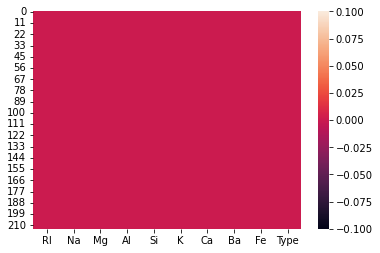

In [9]:
#ploting the heatmap for null values
sns.heatmap(df.isnull())

In [10]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [11]:
#creat new column
df['glass_type'] = df['Type'].apply(lambda x: 'window glass' if x in [1, 2, 3, 4] else 'non-window glass')
#delete Type column
df = df.drop(['Type'], axis = 1)

creating new column 'glass_type' basis on the 'Type' column where i am deviding column into 2 classes assigning (1-4 = windo_glass & outhers non_windo_glass)

In [12]:
df['glass_type'].value_counts()


window glass        162
non-window glass     51
Name: glass_type, dtype: int64

Observation:
- there are 162 values are present in window glass and only 51 values are present in non-window glass it means that the data is imbalanced we have to balance data for further model prediction

In [13]:
#here i am assigning window glass as 1 and non window glass as 0 for further visualization
df['glass_type'] = df['glass_type'].apply(lambda x: 1 if x in 'window glass' else 0)

In [14]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
# Describing the Dataset
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,0.760563
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,0.427745
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,1.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


*Observation*:

1- The dataset consists of measurements for various chemical elements: RI (Refractive Index), Na (Sodium), Mg (Magnesium), Al (Aluminum), Si (Silicon), K (Potassium), Ca (Calcium), Ba (Barium),  Fe (Iron) and glass_type

2- The dataset contains 213 data points for each element, indicating a consistent sample size.

3- The mean values for the elements are as follows: RI = 1.518348, Na = 13.404085, Mg = 2.679202, Al = 1.449484, Si = 72.655070, K = 0.498873, Ca = 8.954085, Ba = 0.175869, Fe = 0.057277 , glass_type = 0.760563

4- The standard deviation values for the elements are as follows: RI = 0.003033, Na = 0.816662, Mg = 1.443691, Al = 0.495925, Si = 0.773998, K = 0.653185, Ca = 1.425882, Ba = 0.498245, Fe = 0.097589 , glass_type= 0.427745

5- The minimum and maximum values for each element are as follows:

- RI: min = 1.511150, max = 1.533930
- Na: min = 10.730000, max = 17.380000
- Mg: min = 0.000000, max = 4.490000
- Al: min = 0.290000, max = 3.500000
- Si: min = 69.810000, max = 75.410000
- K: min = 0.000000, max = 6.210000
- Ca: min = 5.430000, max = 16.190000
- Ba: min = 0.000000, max = 3.150000
- Fe: min = 0.000000, max = 0.510000
- glass_type:  min = 0.000000, max = 1.000000 

6- The dataset includes quartile values (25th, 50th, and 75th percentiles) for each element, providing insights into the distribution of the data.

In [16]:
#checking skewness
df.apply(skew)

RI            1.636389
Na            0.462413
Mg           -1.138009
Al            0.931780
Si           -0.739392
K             6.499244
Ca            2.036282
Ba            3.382711
Fe            1.734845
glass_type   -1.221182
dtype: float64

Observation:
- The feature "K" (Potassium) has a very high positive skewness value of 6.499244. This indicates that the distribution of potassium values is heavily right-skewed, with a long tail on the right side.

- The features "Ca" (Calcium), "Ba" (Barium), "Fe" (Iron), and "glass_type" exhibit positive skewness values above 1, indicating right-skewed distributions. Although their skewness values are not as extreme as "K", they still deviate from a symmetric distribution.

- The features "RI" (Refractive Index), "Na" (Sodium), and "Al" (Aluminum) have positive skewness values below 1, indicating a slight right-skew in their distributions. However, the skewness values are relatively smaller compared to "K", "Ca", "Ba", "Fe", and "glass_type".

- The feature "Mg" (Magnesium) and "Si" (Silicon) exhibit negative skewness values, suggesting left-skewed distributions. However, their skewness values are not as extreme as "K", "Ca", "Ba", "Fe", and "glass_type".

- The feature "glass_type" stands out as it has the lowest skewness value of -1.221182, indicating a slightly left-skewed distribution.    

In [17]:
# checking the value counts
for column in df.columns:
    print("=================",column,"=================")
    print(df[column].value_counts())

================= RI =================
1.51645    3
1.52152    3
1.51590    3
1.51674    2
1.51769    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64
================= Na =================
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.31    1
14.17    1
13.51    1
13.81    1
14.23    1
Name: Na, Length: 142, dtype: int64
================= Mg =================
0.00    42
3.48     8
3.54     8
3.58     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
================= Al =================
1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64
================= Si =================
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
72.34    1
72.26    1
73.26    1
73.25    1
73.61    1
Name: Si, Length: 133, dtype: int64
==========

## Data Visualization

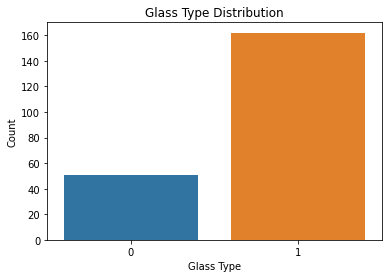

In [18]:
# Bar Plot
sns.countplot(data=df, x='glass_type')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.title('Glass Type Distribution')
plt.show()

<AxesSubplot:xlabel='glass_type', ylabel='RI'>

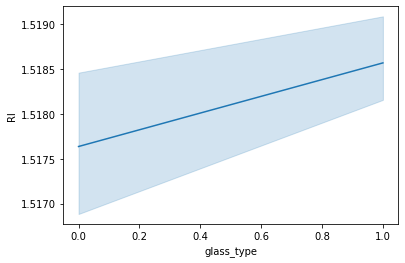

In [19]:
sns.lineplot(x="glass_type",y="RI",data=df)

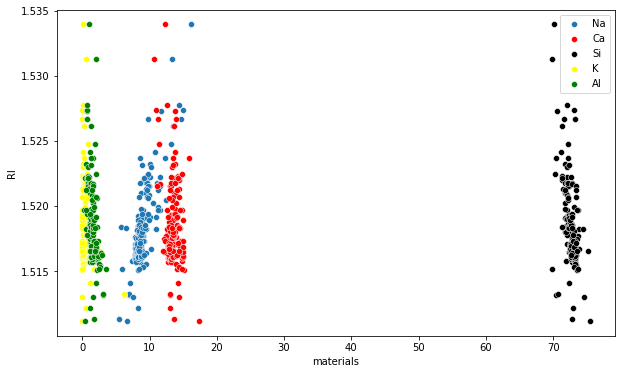

In [20]:
dr=df[["Na","Ca","Si","K","Al"]]
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Ca"],y="RI",data=df)
sns.scatterplot(x=df["Na"],y="RI",data=df,color="red")
sns.scatterplot(x=df["Si"],y="RI",data=df,color="black")
sns.scatterplot(x=df["K"],y="RI",data=df,color="yellow")
sns.scatterplot(x=df["Al"],y="RI",data=df,color="green")
plt.xlabel("materials")
plt.legend(df[["Na","Ca","Si","K","Al"]])

In [21]:
df_1=df[df["glass_type"]==1]["RI"]
df_2=df[df["glass_type"]==0]["RI"]

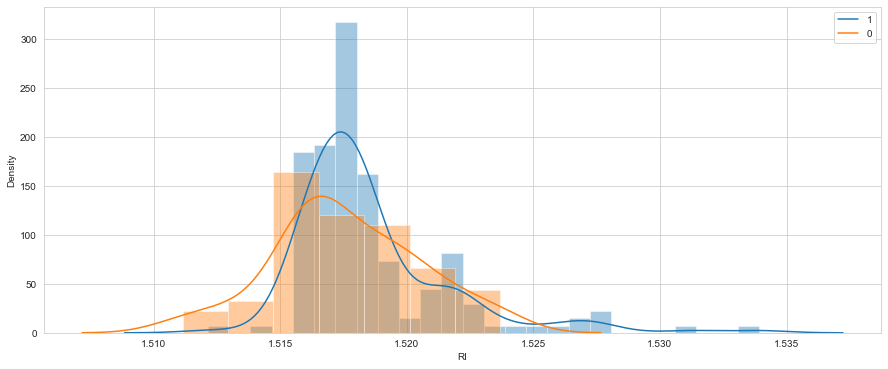

In [22]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
sns.distplot(df_1)
sns.distplot(df_2)
plt.legend(df["glass_type"].unique())

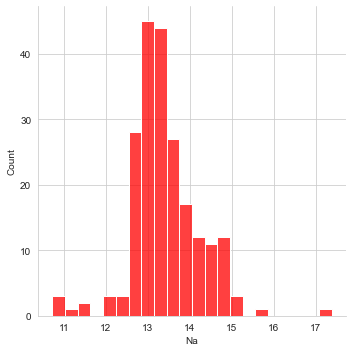

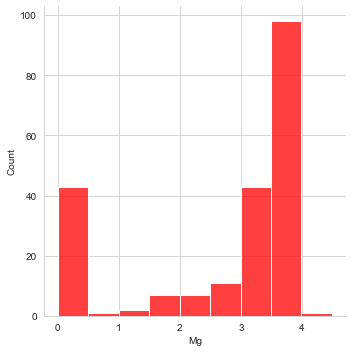

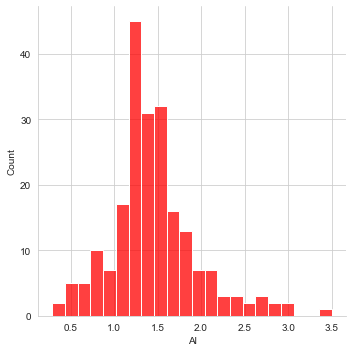

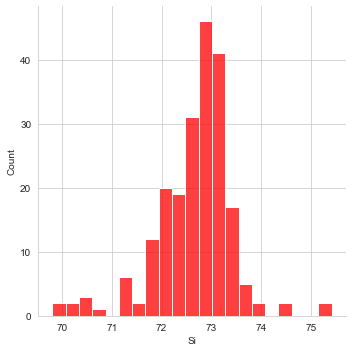

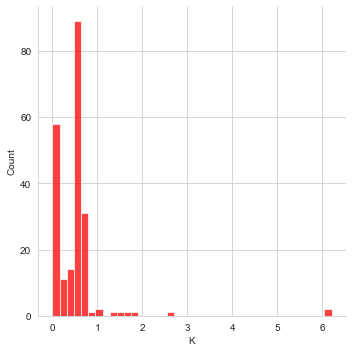

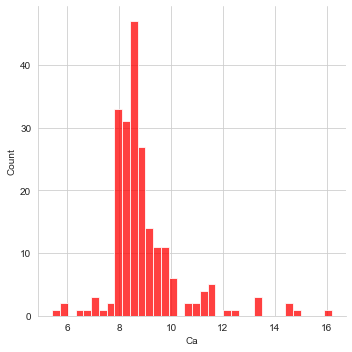

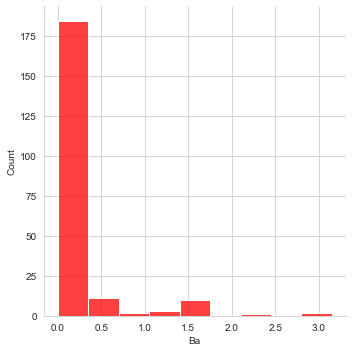

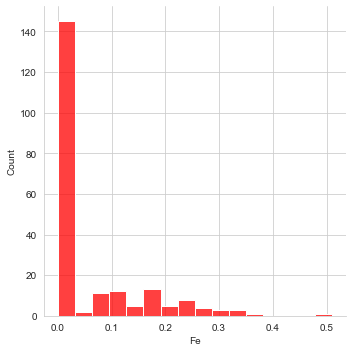

In [23]:
sns.displot(df["Na"],
             color="red")
sns.displot(df["Mg"],
             color="red")
sns.displot(df["Al"],
             color="red")
sns.displot(df["Si"],
             color="red")
sns.displot(df["K"],
             color="red")
sns.displot(df["Ca"],
             color="red")
sns.displot(df["Ba"],
             color="red")
sns.displot(df["Fe"],
             color="red")

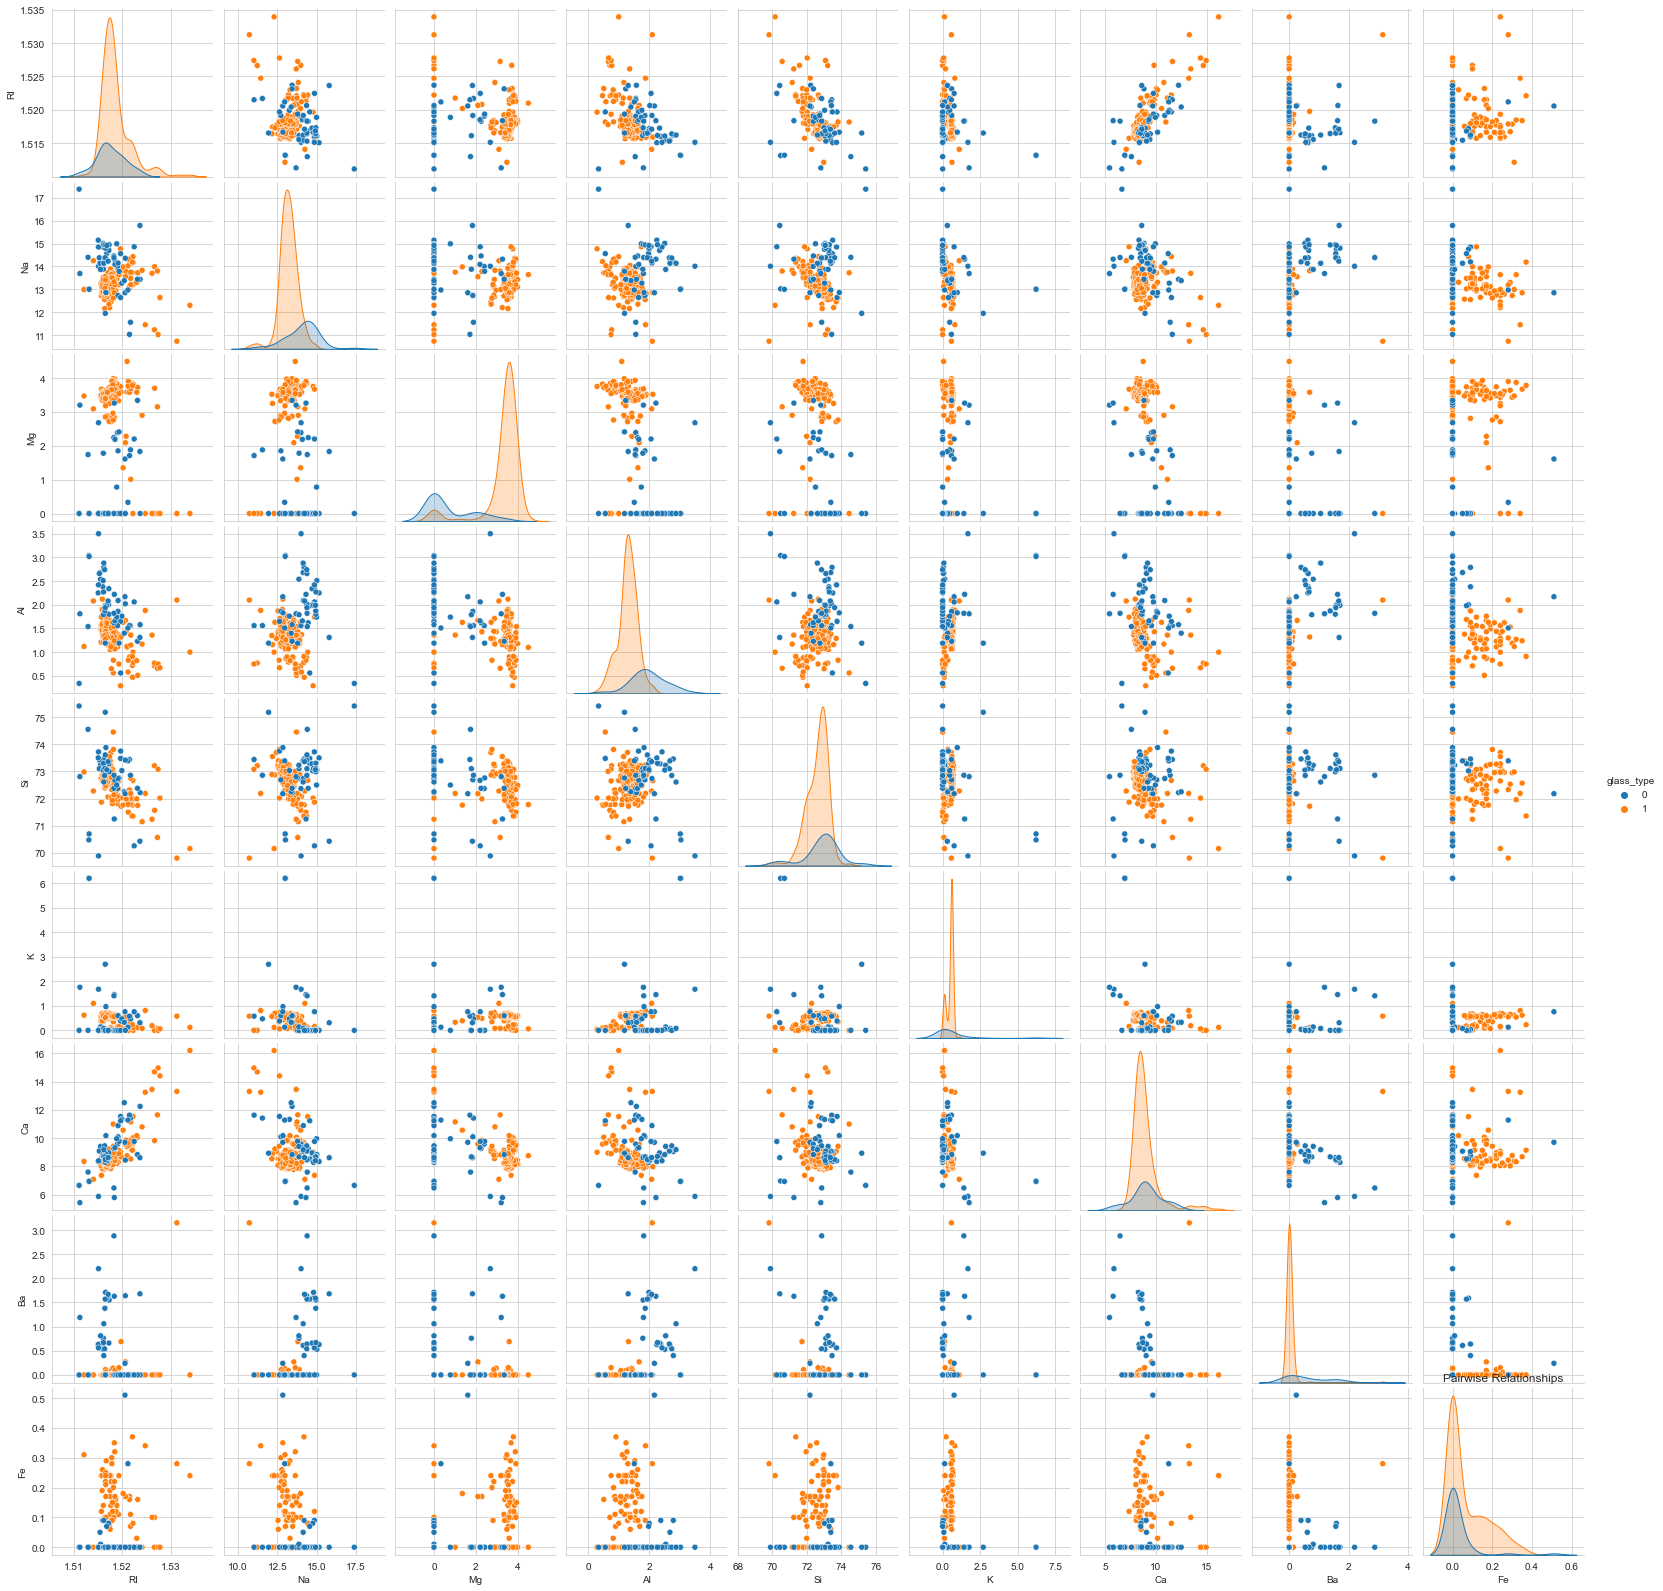

In [24]:
# Pair Plot
sns.pairplot(df, hue='glass_type')
plt.title('Pairwise Relationships')
plt.show()

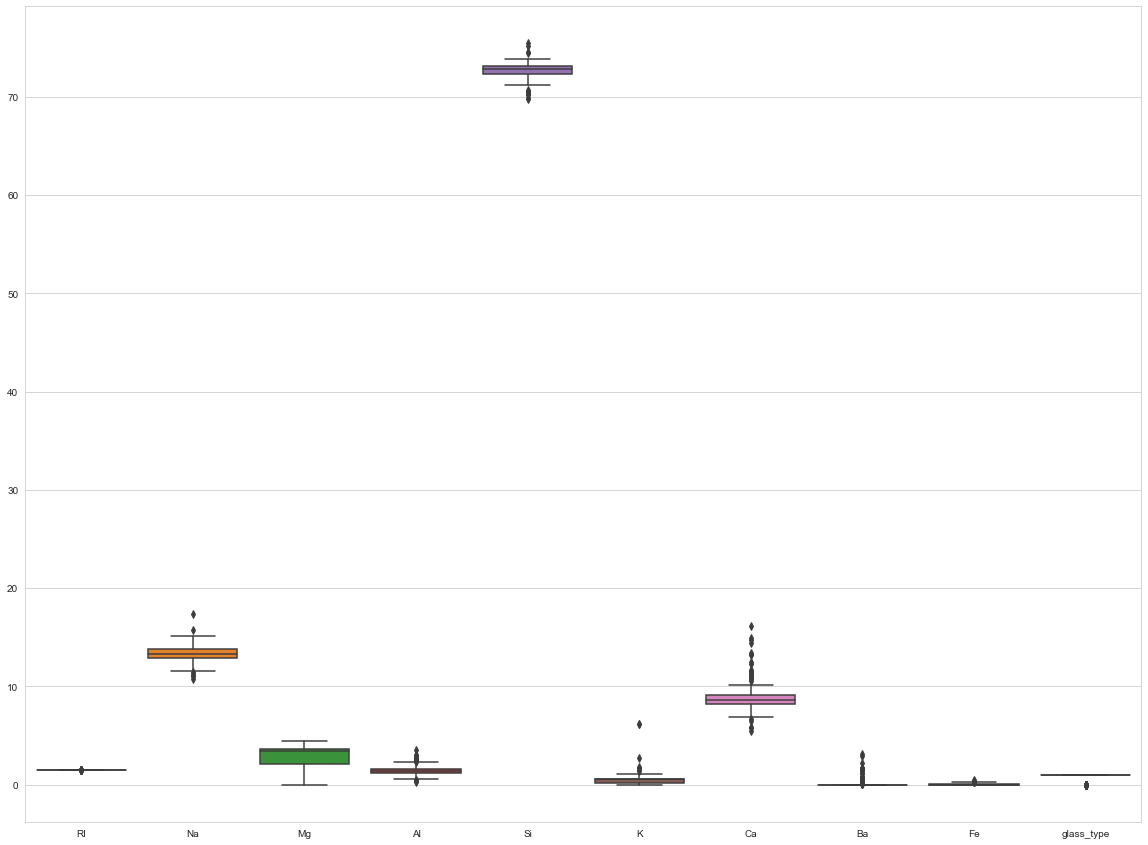

In [25]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df[df.columns])  # Pass the DataFrame directly to the `data` parameter
plt.show()

Observatiom:
- there are some outliers are present in my dataset    

## Handling Outliers with the help of Z score

In [26]:
from scipy import stats

z = abs(stats.zscore(df))

#np.where(z > 3)

df = df[(z < 3).all(axis=1)]

df.shape

(193, 10)

Observation:
- here i  removed the outliers with the zscore here i have taken threshold value = 3    

## Checking Correlation

In [27]:
#schecking correlation
df_corr = df.corr()
df_corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
RI,1.000000,0.040332,0.041898,-0.512695,-0.603075,-0.361896,0.690392,-0.191456,-0.014611,0.056205
Na,0.040332,1.000000,-0.494587,0.270531,-0.227131,-0.609457,0.015443,0.536225,-0.207092,-0.468853
Mg,0.041898,-0.494587,1.000000,-0.593379,-0.374469,0.489194,-0.459698,-0.586259,0.136628,0.840200
Al,-0.512695,0.270531,-0.593379,1.000000,0.323195,-0.007018,-0.207690,0.534822,-0.126130,-0.602747
Si,-0.603075,-0.227131,-0.374469,0.323195,1.000000,0.063589,-0.160678,0.153198,0.018331,-0.280568
K,-0.361896,-0.609457,0.489194,-0.007018,0.063589,1.000000,-0.498531,-0.256788,0.096242,0.401138
Ca,0.690392,0.015443,-0.459698,-0.207690,-0.160678,-0.498531,1.000000,-0.166786,-0.009297,-0.290665
Ba,-0.191456,0.536225,-0.586259,0.534822,0.153198,-0.256788,-0.166786,1.000000,-0.121189,-0.618002
Fe,-0.014611,-0.207092,0.136628,-0.126130,0.018331,0.096242,-0.009297,-0.121189,1.000000,0.209504
glass_type,0.056205,-0.468853,0.840200,-0.602747,-0.280568,0.401138,-0.290665,-0.618002,0.209504,1.000000


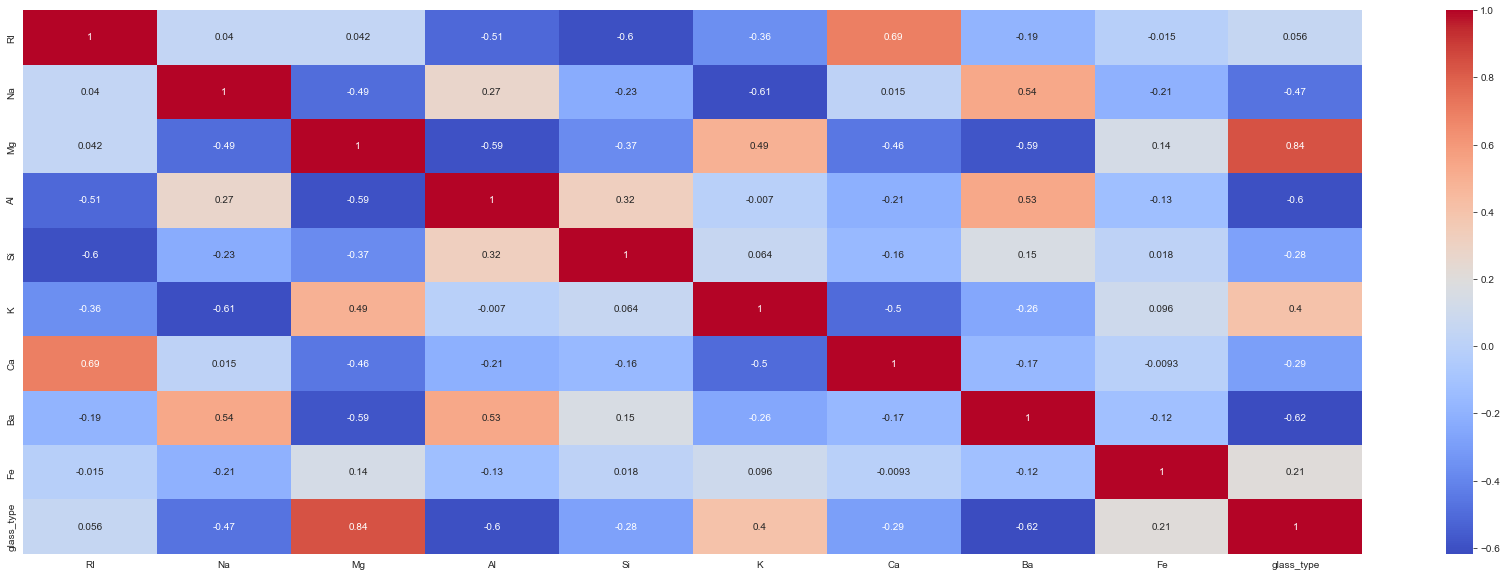

In [28]:
plt.figure(figsize=(30, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

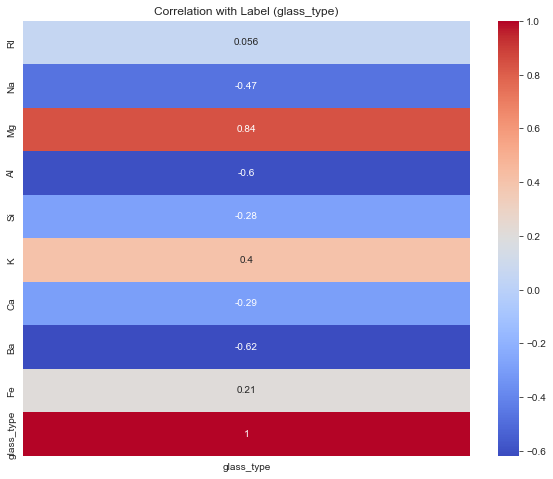

In [29]:
plt.figure(figsize=(10, 8))
corr_with_label = df.corr()["glass_type"]  
sns.heatmap(corr_with_label.to_frame(), annot=True, cmap="coolwarm")
plt.title('Correlation with Label (glass_type)')
plt.show()


In [30]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type'], dtype='object')

## Scaling data Using StandardScaler

In [31]:
scaler = StandardScaler()
features_to_scale =['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba']
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = df.copy()
scaled_df[features_to_scale] = scaled_features

In [32]:
scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.308474,0.338598,1.235597,-0.747371,-1.627964,-1.326595,-0.071659,-0.347296,0.0,1
1,-0.189678,0.711257,0.554625,-0.154343,0.007672,0.166308,-1.003126,-0.347296,0.0,1
2,-0.819783,0.174628,0.516368,0.256215,0.455320,-0.153600,-1.053749,-0.347296,0.0,1
3,-0.167646,-0.302375,0.623487,-0.314005,-0.198935,0.486216,-0.608265,-0.347296,0.0,1
4,-0.273398,-0.212937,0.569928,-0.428049,0.610274,0.415125,-0.760134,-0.347296,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,-0.722844,1.426762,-2.199867,2.993267,0.214279,-1.539867,0.637065,1.165248,0.0,0
209,-0.797751,1.083916,-2.199867,3.312590,-0.198935,-1.255504,0.363700,2.621773,0.0,0
210,-0.524559,2.246611,-2.199867,1.282609,0.575840,-1.539867,-0.426022,4.106307,0.0,0
211,1.149847,1.411856,-2.199867,1.351036,1.195660,-1.539867,-0.385523,4.246358,0.0,0


## Deviding into Feature and Label

In [33]:
X = scaled_df.drop('glass_type', axis = 1)
y = scaled_df['glass_type']

## Data Balancing Using SMOTE

In [34]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [35]:
y_resampled.value_counts()

1    153
0    153
Name: glass_type, dtype: int64

Observation:
- Now my data looks balanced

## Train Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

# Model Training

## Logistic Regression with Hyperparameter Tuning

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        31

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62

Cross-Validation Scores: [0.87179487 0.82051282 0.82051282 0.92105263 0.97368421]
Mean Cross-Validation Score: 0.8815114709851551


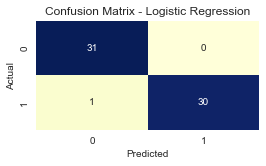

ROC AUC Score: 0.9927159209157128


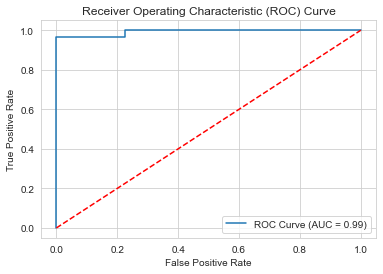

In [37]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score
y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree Classifier with Hyperparameter Tuning

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.94      0.97        31

    accuracy                           0.97        62
   macro avg       0.97      0.97      0.97        62
weighted avg       0.97      0.97      0.97        62

Cross-Validation Scores: [0.79487179 0.84615385 0.8974359  0.94736842 1.        ]
Mean Cross-Validation Score: 0.8971659919028341


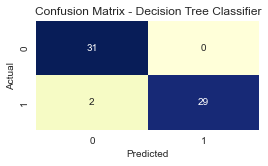

ROC AUC Score: 0.967741935483871


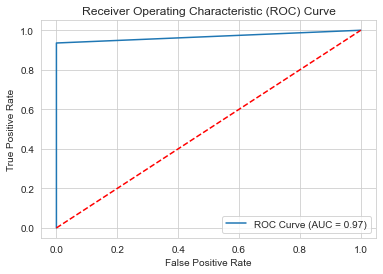

In [38]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score
y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier with Hyperparameter Tuning

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.94      0.94      0.94        31

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62

Cross-Validation Scores: [0.79487179 0.87179487 0.92307692 0.89473684 0.97368421]
Mean Cross-Validation Score: 0.8916329284750336


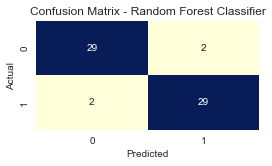

ROC AUC Score: 0.9937565036420395


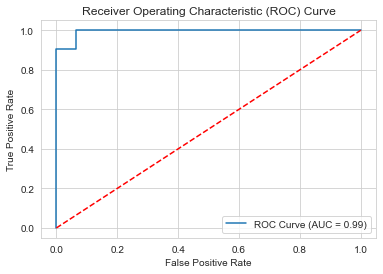

In [39]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train, y_train)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC AUC Score
y_prob = best_RF.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## K Neighbour Classifier with Hyperparameter Tuning

K Neighbors Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        31

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62

Cross-Validation Scores: [0.84615385 0.82051282 0.8974359  0.92105263 0.97368421]
Mean Cross-Validation Score: 0.8917678812415654


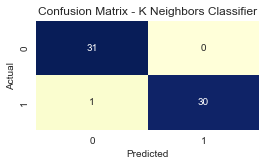

ROC AUC Score: 1.0


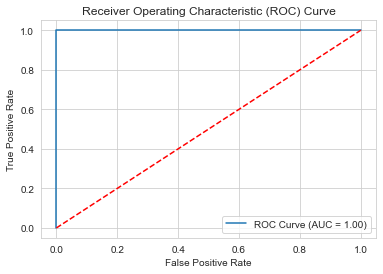

In [40]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Classifier
KN = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(KN, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the K Neighbors Classifier with the best parameters
best_KN = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_KN.fit(X_train, y_train)

# Make predictions on the test set
KN_y_pred = best_KN.predict(X_test)

print("K Neighbors Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, KN_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_KN, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, KN_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - K Neighbors Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score
y_prob = best_KN.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Extra Tree Classifier with Hyperparameter Tuning

Extra Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        31

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62

Cross-Validation Scores: [0.79487179 0.84615385 0.8974359  0.89473684 0.97368421]
Mean Cross-Validation Score: 0.8813765182186234


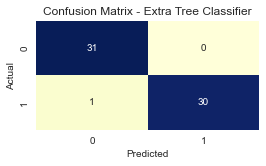

ROC AUC Score: 0.9968782518210197


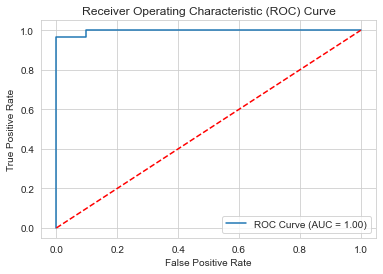

In [41]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Extra Trees Classifier
ET = ExtraTreesClassifier()

# Create the grid search object
grid_search = GridSearchCV(ET, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Create the Extra Trees Classifier with the best parameters
best_ET = ExtraTreesClassifier(**best_params)

# Fit the model on the training data
best_ET.fit(X_train, y_train)

# Make predictions on the test set
ET_y_pred = best_ET.predict(X_test)

print("Extra Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, ET_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_ET, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, ET_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Extra Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score
y_prob = best_ET.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Support Vector Classifier with Hyperparameter Tuning

Support Vector Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        31

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62

Cross-Validation Scores: [0.8974359  0.87179487 0.94871795 0.94736842 1.        ]
Mean Cross-Validation Score: 0.9330634278002699


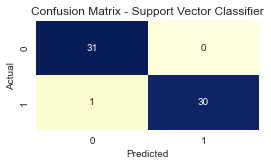

ROC AUC Score: 1.0


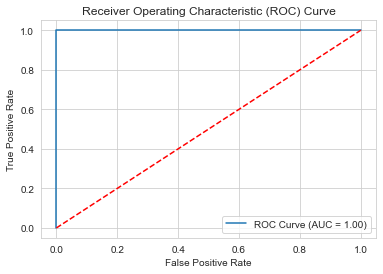

In [42]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVC
SV = SVC()

# Create the grid search object
grid_search = GridSearchCV(SV, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the SVC with the best parameters
best_SV = SVC(**best_params)

# Fit the model on the training data
best_SV.fit(X_train, y_train)

# Make predictions on the test set
SV_y_pred = best_SV.predict(X_test)

print("Support Vector Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, SV_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_SV, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, SV_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC AUC Score
y_prob = best_SV.decision_function(X_test)
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## XGBoost Classifier with Hyperparameter Tuning

XGBoost Classifier :
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.94      0.97        31

    accuracy                           0.97        62
   macro avg       0.97      0.97      0.97        62
weighted avg       0.97      0.97      0.97        62

Cross-Validation Scores: [1.         0.88709677 0.73790323 1.         1.        ]
Mean Cross-Validation Score: 0.925


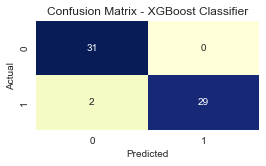

ROC AUC Score: 0.9927159209157128


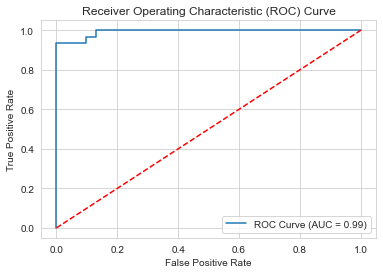

In [43]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost classifier
XGB = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(XGB, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the XGBoost classifier with the best parameters
best_XGB = XGBClassifier(**best_params)

# Fit the model on the training data and make prediction on test data
best_XGB.fit(X_train, y_train)
XGB_y_pred = best_XGB.predict(X_test)


print("XGBoost Classifier :")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, XGB_y_pred))


# Cross-Validation Score
scores = cross_val_score(best_XGB, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, XGB_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compute ROC AUC score
y_prob = best_XGB.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Creating DataFrame of All the Models in Their descending Order

In [44]:
# Create a list of model names
model_names = ['Extra Tree Classifier', 'Support Vector Classifier', 'K Neighbour Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression','XGBoost Classifier']

# Create a list of models and their corresponding accuracy scores
models = [ET, SV, KN, RF, dt, LG]
accuracy_scores = [accuracy_score(y_test, ET_y_pred), accuracy_score(y_test, SV_y_pred), accuracy_score(y_test, KN_y_pred), accuracy_score(y_test, RF_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred),accuracy_score(y_test, XGB_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)


                  Model Name  Accuracy Score
1      Extra Tree Classifier        0.983871
2  Support Vector Classifier        0.983871
3     K Neighbour Classifier        0.983871
4        Logistic Regression        0.983871
5   Decision Tree Classifier        0.967742
6         XGBoost Classifier        0.967742
7   Random Forest Classifier        0.935484


## Save Best Model

In [45]:
filename = 'Extra_tree_classifier.pkl'
pickle.dump(ET, open(filename, 'wb'))

# PROJECT COMPLETED